The purpose of the project is to test the students’ ability to apply data science techniques in health care and solve a practical problem and
interpret & apply the results.  

The Final class project covers:
1. Choose a real-world health care problem with an objective.
  *   **Problem**: Provider Fraud in Medicare leading to increased healthcare costs.
  *   **Objective**: Predict potentially fraudulent providers based on claims and identify key variables for detection.
2. Procure and analyze the data   

  *   **Source**: Kaggle
  *   **URL**: https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/
  *   Description:
    *   Data includes Inpatient claims, Outpatient claims, and Beneficiary details.
      *   Inpatient data covers admitted patients with admission/discharge dates and diagnosis codes.
      *   Outpatient data focuses on non-admitted patients.
      *   Beneficiary details include health conditions and region information.



3. Do a survey of existing solutions for the problem.  
  *   Refer to Baseline_modeling.ipynb for this step.


4. Develop at a state-of-the-art statistical/machine learning/deep learning model for the health care problem

## 4.- Develop at a state-of-the-art statistical/machine learning/deep learning model for the health care problem

In [ ]:
import numpy as np
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files

/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files


In [ ]:
## Jsut testing something...

In [ ]:
train = pd.read_csv('Final_Train.csv')
test = pd.read_csv('Final_Test.csv')

In [ ]:
train.shape

(5410, 238)

In [ ]:
train.head()

,Unnamed: 0,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,...,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,0,PRV51001,0,104640,5340.0,30.0,61,0.0,5,8,...,297,297,297,405,9,16,21,4,0,0
1,1,PRV51003,1,605670,66286.0,382.0,617,0.0,62,29,...,3046,4452,5556,4972,54,78,107,24,0,1
2,2,PRV51004,0,52170,310.0,0.0,362,0.0,0,23,...,13263,15655,17719,22201,46,103,120,24,5,0
3,3,PRV51005,1,280910,3700.0,0.0,2433,0.0,0,259,...,771875,1002383,1134445,1357225,511,654,893,262,10,0
4,4,PRV51007,0,33710,3264.0,19.0,141,0.0,3,11,...,2622,3378,3612,4764,34,38,58,14,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Columns: 238 entries, Unnamed: 0 to Race_5
dtypes: float64(186), int64(51), object(1)
memory usage: 9.8+ MB


In [ ]:
# split the data into train and validation
train, validation = train_test_split(train, test_size=0.2, random_state=42, stratify=train['PotentialFraud'])
train = train.sort_index(axis=0)
validation = validation.sort_index(axis=0)

In [ ]:
# Seperate dependent and independent variables
x_train = train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = train['PotentialFraud']
x_train.shape, y_train.shape

((4328, 236), (4328,))

In [ ]:
# Seperate dependent and independent variables
x_val = validation.drop(axis=1,columns=['Provider','PotentialFraud'])
y_val = validation['PotentialFraud']
x_val.shape, y_val.shape

((1082, 236), (1082,))

In [ ]:
# Seperate dependent and independent variables
x_test = test.drop(axis=1,columns=['Provider'])
x_test.shape

(1353, 236)

In [ ]:
#%pip install livelossplot

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.inputs.keras import PlotLossesCallback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
#%pip install --upgrade tensorflow

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight("balanced", classes= np.unique(y_train), y= y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

### Initial modeling
f1 0.45

In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(236, input_shape=(236,), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

#Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))#model.add(Dropout(0.5))
model.add(Dropout(0.2))

# model1.add(Dense(16, activation='relu'))#model.add(Dropout(0.5))
# model1.add(Dropout(0.2))

# model1.add(Dense(8, activation='relu'))#model.add(Dropout(0.5))
# model1.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 236)               55932     
                                                                 
 dropout (Dropout)           (None, 236)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               30336     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)               

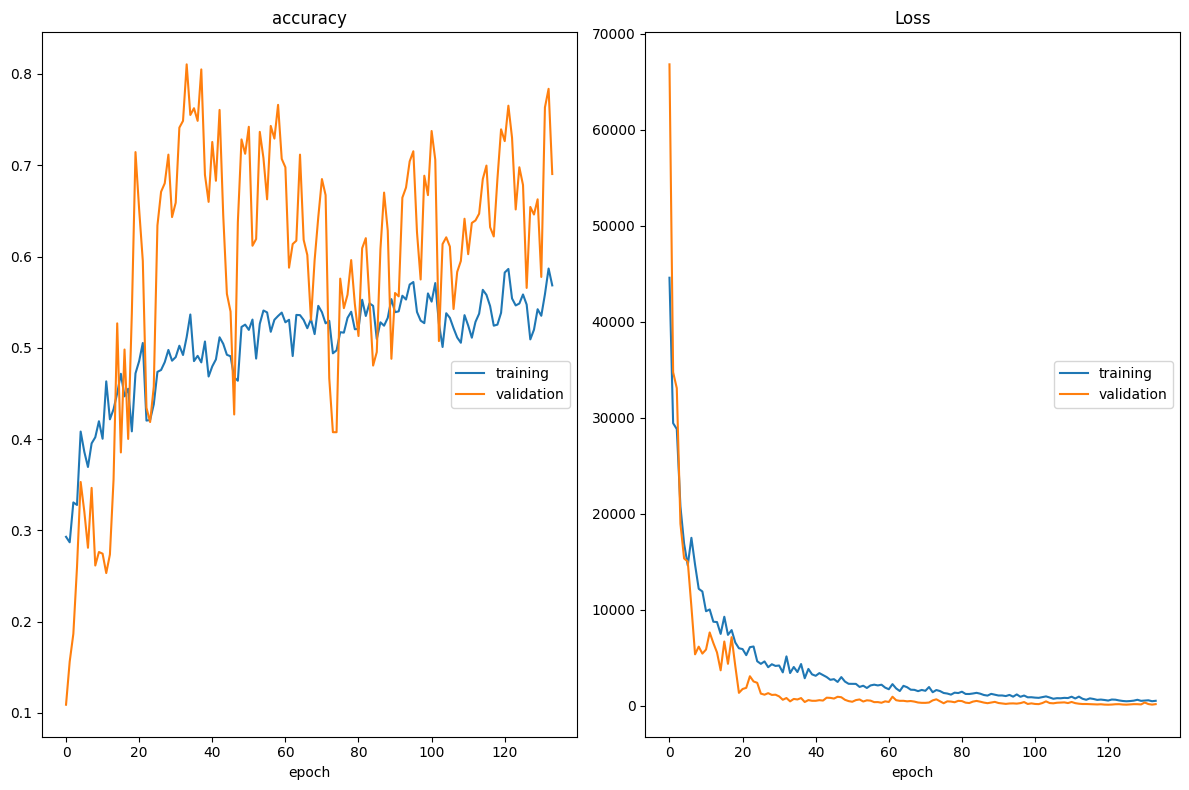

accuracy
	training         	 (min:    0.287, max:    0.587, cur:    0.568)
	validation       	 (min:    0.109, max:    0.811, cur:    0.690)
Loss
	training         	 (min:  446.766, max: 44572.320, cur:  495.559)
	validation       	 (min:   88.602, max: 66803.172, cur:  147.151)
34/34 [==============================] - 1s 25ms/step - loss: 495.5591 - accuracy: 0.5684 - val_loss: 147.1507 - val_accuracy: 0.6904


In [ ]:
# Define the checkpoint callback to save the best model
checkpoint_path = "e_1_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_1 = PlotLossesCallback()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=300,  # You can adjust the number of epochs
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_callback, early_stop, plot_loss_1],
                    class_weight = class_weight_dict) #checkpoint_callback

34/34 [==============================] - 0s 2ms/step


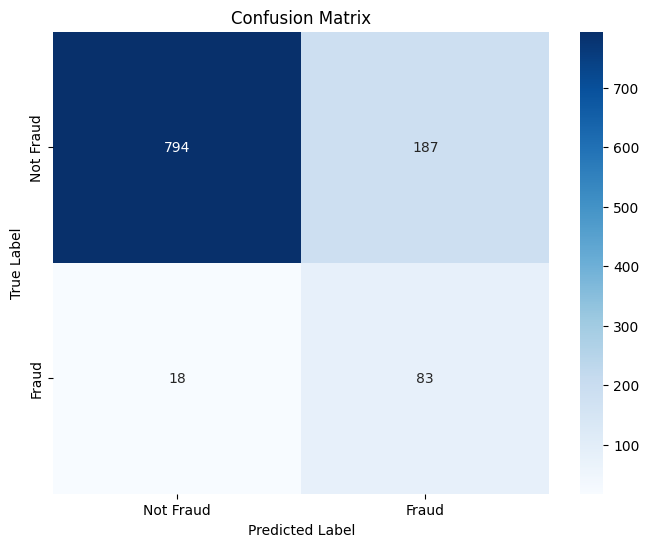

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       981
           1       0.31      0.82      0.45       101

    accuracy                           0.81      1082
   macro avg       0.64      0.82      0.67      1082
weighted avg       0.92      0.81      0.84      1082

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 236)               55932     
                                                                 
 dropout (Dropout)           (None, 236)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               30336     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Modeling 1 (No dropout)
f1 0.64

In [ ]:
# Define the model
model1 = Sequential()

# Input layer
model1.add(Dense(236, input_shape=(236,), activation='relu'))
#model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

#Hidden layers
model1.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(32, activation='relu'))#model.add(Dropout(0.5))
#model.add(Dropout(0.2))

# model1.add(Dense(16, activation='relu'))#model.add(Dropout(0.5))
# model1.add(Dropout(0.2))

# model1.add(Dense(8, activation='relu'))#model.add(Dropout(0.5))
# model1.add(Dropout(0.2))

# Output layer
model1.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model1.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 236)               55932     
                                                                 
 dense_27 (Dense)            (None, 128)               30336     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 96637 (377.49 KB)
Trainable params: 96637 (377.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


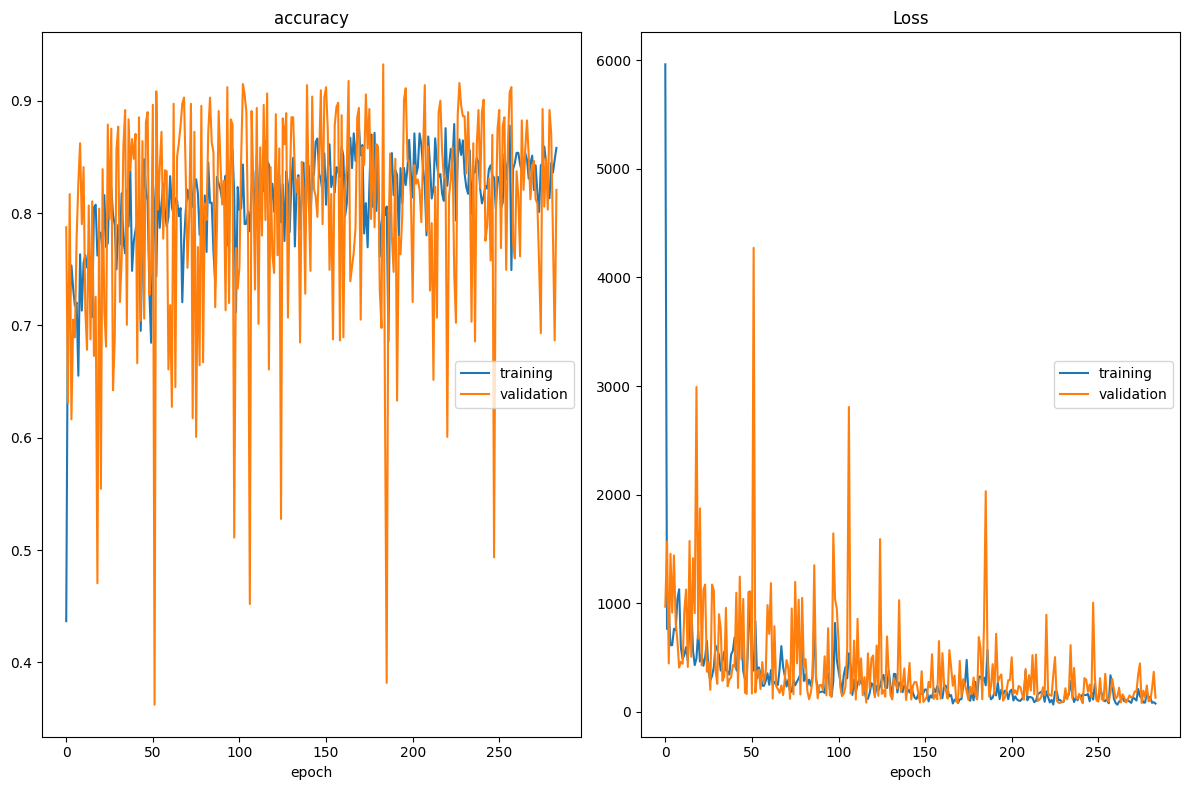

accuracy
	training         	 (min:    0.437, max:    0.879, cur:    0.858)
	validation       	 (min:    0.362, max:    0.933, cur:    0.821)
Loss
	training         	 (min:   66.716, max: 5962.318, cur:   77.387)
	validation       	 (min:   80.511, max: 4272.787, cur:  131.340)
34/34 [==============================] - 1s 24ms/step - loss: 77.3872 - accuracy: 0.8581 - val_loss: 131.3403 - val_accuracy: 0.8207


In [ ]:
# Define the checkpoint callback to save the best model
checkpoint_path = "f_1_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_1 = PlotLossesCallback()

# Train the model
history_1 = model1.fit(x_train, y_train,
                    epochs=300,  # You can adjust the number of epochs
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_callback, early_stop, plot_loss_1],
                    class_weight = class_weight_dict) #checkpoint_callback

34/34 [==============================] - 0s 2ms/step


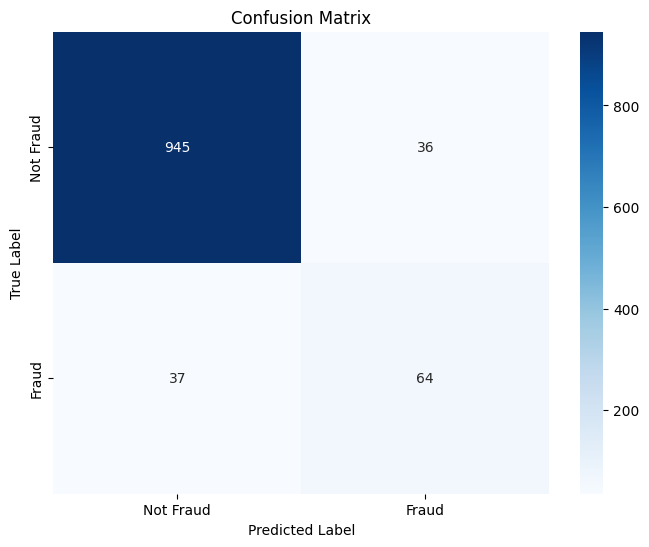

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       981
           1       0.64      0.63      0.64       101

    accuracy                           0.93      1082
   macro avg       0.80      0.80      0.80      1082
weighted avg       0.93      0.93      0.93      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model1.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Modeling 2 (Shallow NN)
f1 0.58

In [ ]:
# Define the model
model2 = Sequential()

# Input layer
model2.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model2.add(Dense(128, activation='relu'))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model2.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 236)               55932     
                                                                 
 dense_19 (Dense)            (None, 128)               30336     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


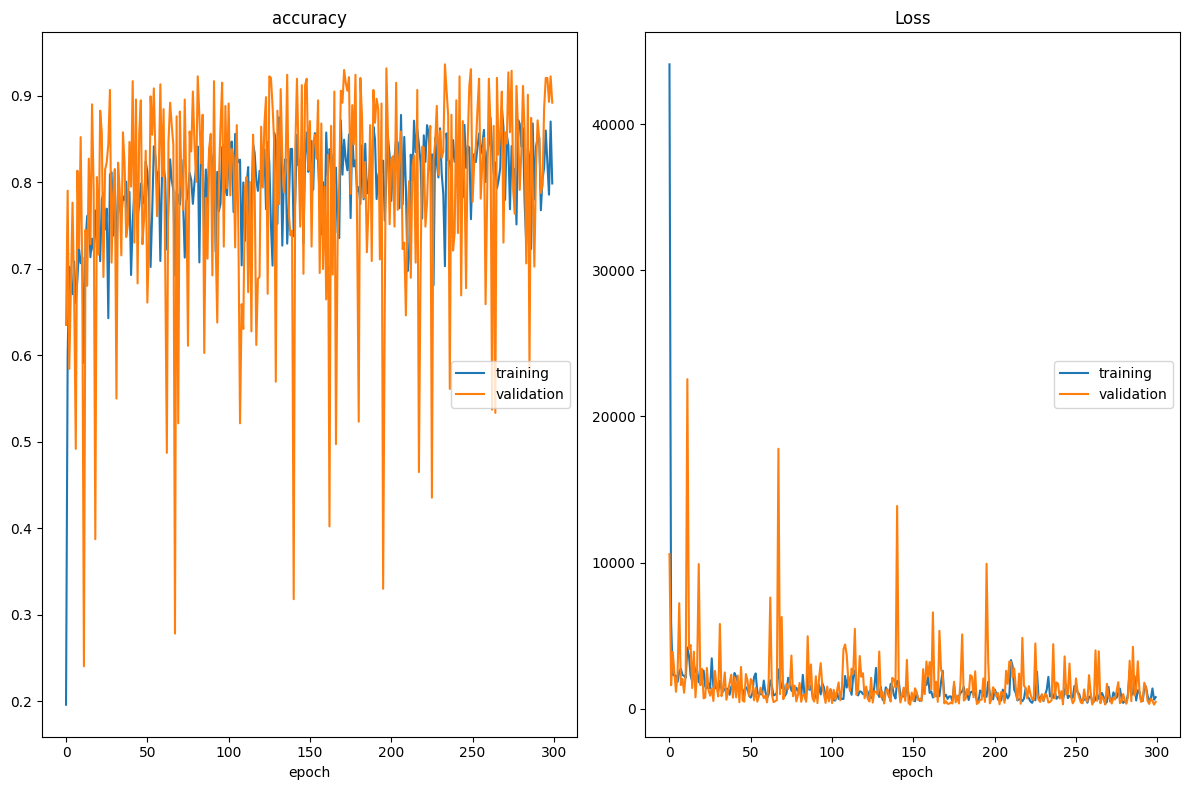

accuracy
	training         	 (min:    0.196, max:    0.886, cur:    0.799)
	validation       	 (min:    0.240, max:    0.936, cur:    0.892)
Loss
	training         	 (min:  361.240, max: 44095.141, cur:  790.703)
	validation       	 (min:  272.609, max: 22550.260, cur:  471.780)
34/34 [==============================] - 1s 31ms/step - loss: 790.7035 - accuracy: 0.7985 - val_loss: 471.7800 - val_accuracy: 0.8919


In [ ]:
checkpoint_path = "002_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_2 = PlotLossesCallback()

history_2 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),
                       batch_size=128,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_2],
                       class_weight=class_weight_dict)

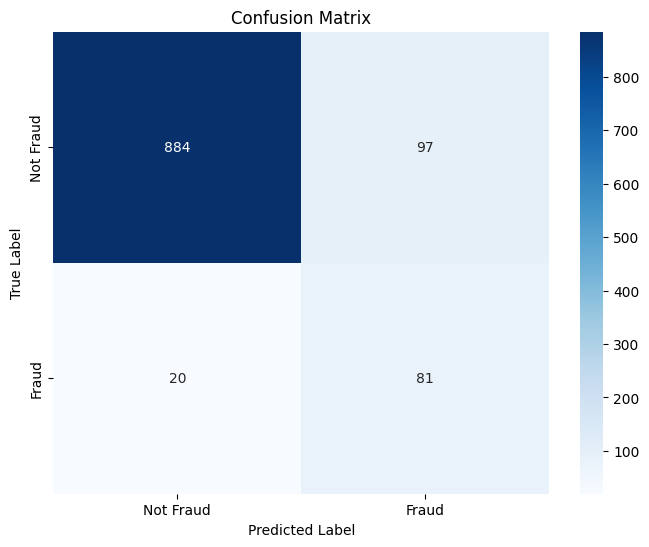

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       981
           1       0.46      0.80      0.58       101

    accuracy                           0.89      1082
   macro avg       0.72      0.85      0.76      1082
weighted avg       0.93      0.89      0.90      1082

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 236)               55932     
                                                                 
 dense_19 (Dense)            (None, 128)               30336     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 By

In [ ]:
y_pred_binary = (y_pred > best_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

In [ ]:
y_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Modeling 3 without class weight
F1 0.53

In [ ]:
# Define the model
model3 = Sequential()

# Input layer
model3.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model3.add(Dense(128, activation='relu'))

# Output layer
model3.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model3.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 236)               55932     
                                                                 
 dense_1 (Dense)             (None, 128)               30336     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


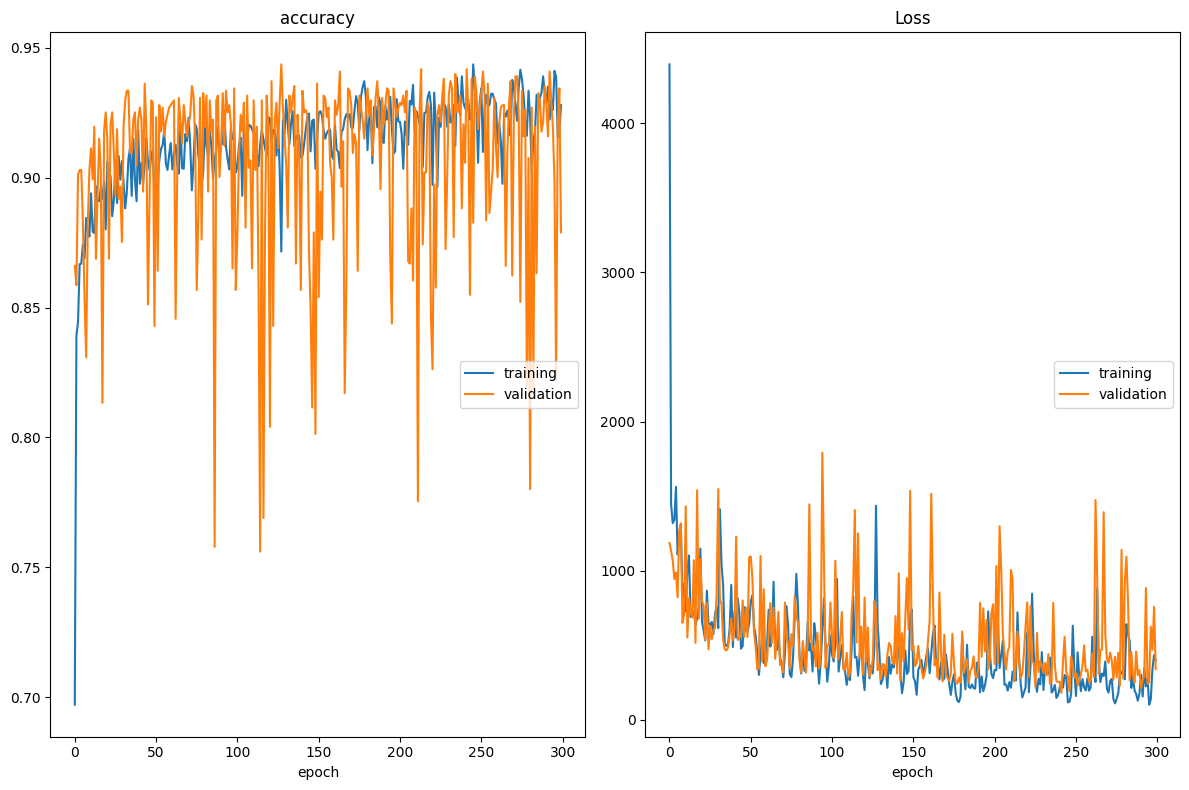

accuracy
	training         	 (min:    0.697, max:    0.944, cur:    0.928)
	validation       	 (min:    0.756, max:    0.944, cur:    0.879)
Loss
	training         	 (min:  101.617, max: 4395.294, cur:  398.389)
	validation       	 (min:  180.871, max: 1791.848, cur:  340.684)
34/34 [==============================] - 1s 31ms/step - loss: 398.3891 - accuracy: 0.9279 - val_loss: 340.6838 - val_accuracy: 0.8789


In [ ]:
checkpoint_path = "a_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=300,
                           restore_best_weights=True)

plot_loss_2 = PlotLossesCallback()

history_2 = model3.fit(x_train,y_train,validation_data=(x_val,y_val),
                       batch_size=128,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_2])
                       #class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


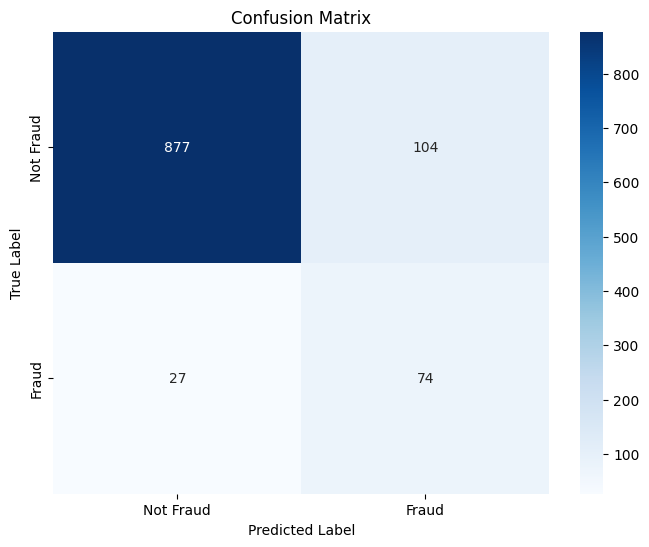

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       981
           1       0.42      0.73      0.53       101

    accuracy                           0.88      1082
   macro avg       0.69      0.81      0.73      1082
weighted avg       0.92      0.88      0.89      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model3.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Modeling 3 with class weight (model 4)
f1  0.56

In [ ]:
# Define the model
model4 = Sequential()

# Input layer
model4.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model4.add(Dense(128, activation='relu'))

# Output layer
model4.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model4.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 236)               55932     
                                                                 
 dense_4 (Dense)             (None, 128)               30336     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


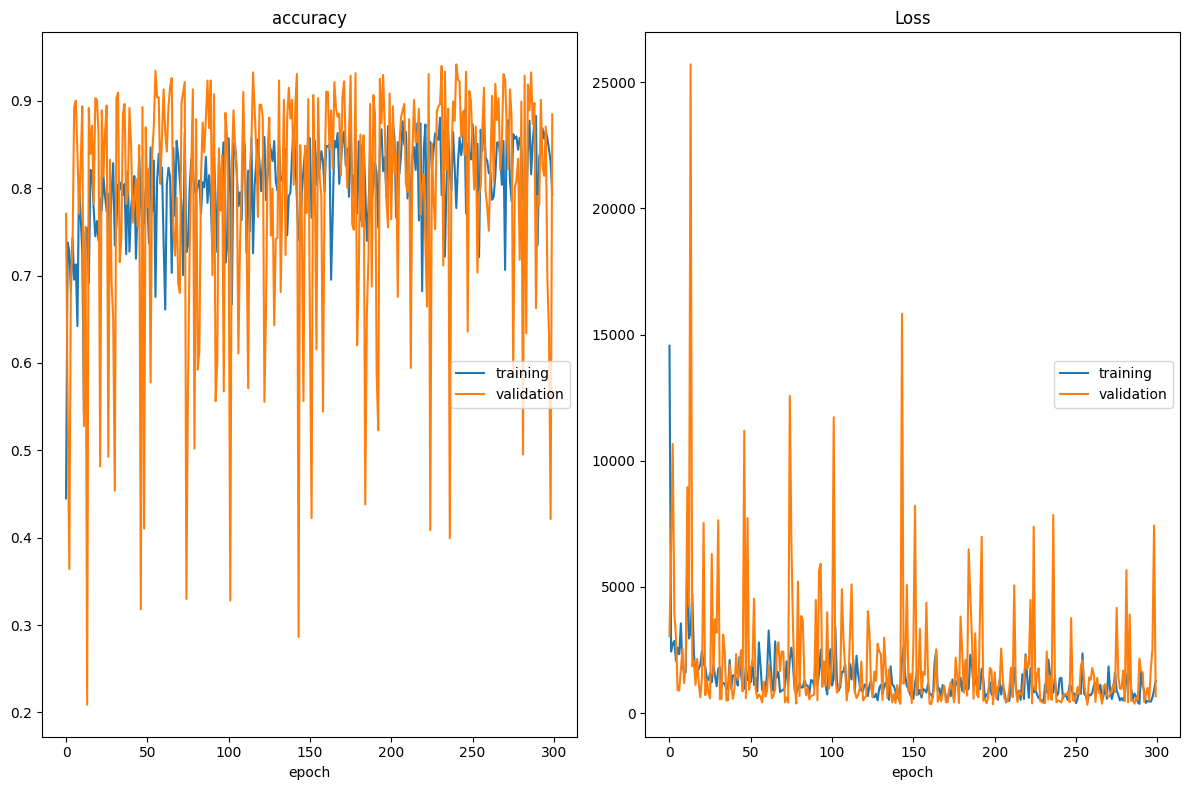

accuracy
	training         	 (min:    0.445, max:    0.889, cur:    0.793)
	validation       	 (min:    0.209, max:    0.942, cur:    0.884)
Loss
	training         	 (min:  363.722, max: 14561.194, cur: 1279.345)
	validation       	 (min:  333.647, max: 25711.480, cur:  669.100)
34/34 [==============================] - 1s 21ms/step - loss: 1279.3448 - accuracy: 0.7925 - val_loss: 669.1005 - val_accuracy: 0.8845


In [ ]:
checkpoint_path = "b4_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=300,
                           restore_best_weights=True)

plot_loss_4 = PlotLossesCallback()

history_4 = model4.fit(x_train,y_train,validation_data=(x_val,y_val),
                       batch_size=128,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_4],
                       class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


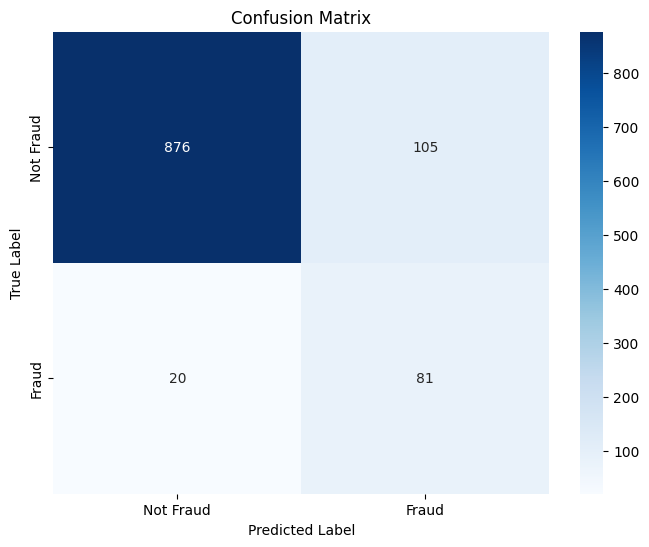

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       981
           1       0.44      0.80      0.56       101

    accuracy                           0.88      1082
   macro avg       0.71      0.85      0.75      1082
weighted avg       0.93      0.88      0.90      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model4.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Reduced batch size (model 5)
F1  0.55

In [ ]:
# Define the model
model5 = Sequential()

# Input layer
model5.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model5.add(Dense(128, activation='relu'))

# Output layer
model5.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model5.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 236)               55932     
                                                                 
 dense_7 (Dense)             (None, 128)               30336     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


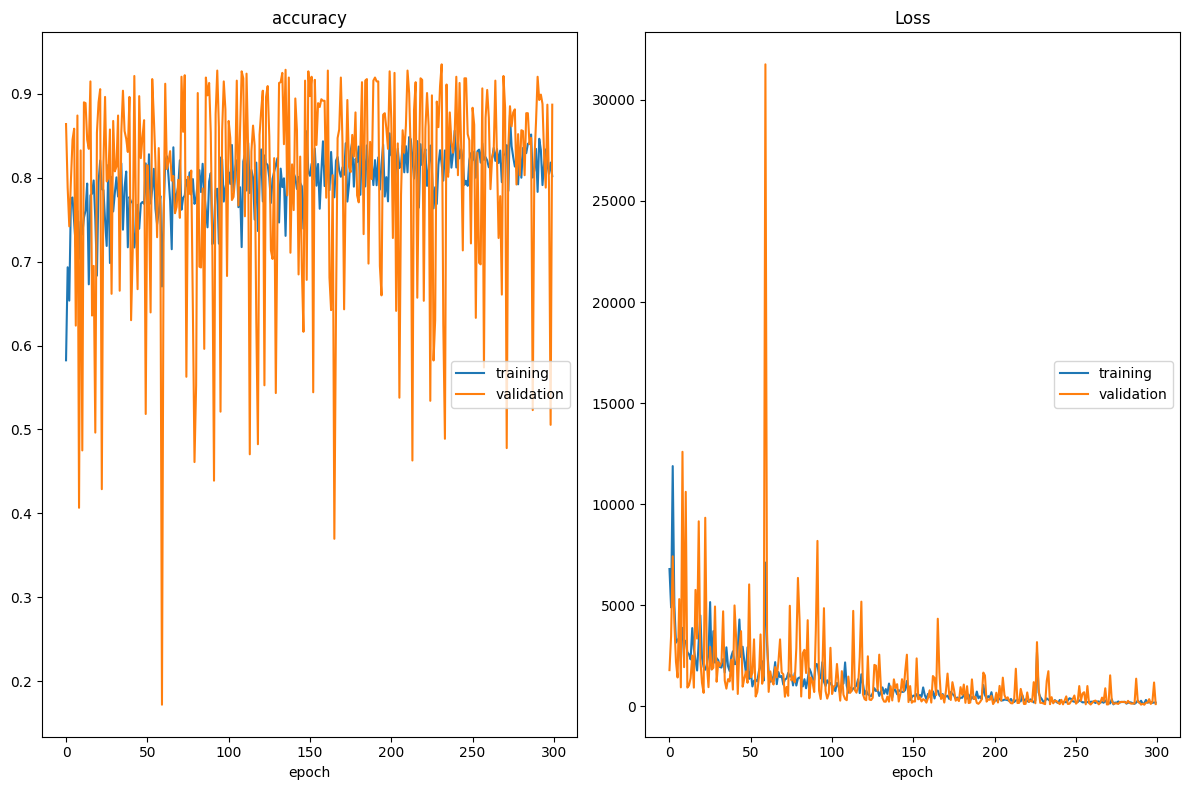

accuracy
	training         	 (min:    0.582, max:    0.875, cur:    0.802)
	validation       	 (min:    0.172, max:    0.935, cur:    0.887)
Loss
	training         	 (min:  100.440, max: 11886.015, cur:  184.854)
	validation       	 (min:   83.774, max: 31757.707, cur:  114.923)
136/136 [==============================] - 2s 14ms/step - loss: 184.8541 - accuracy: 0.8020 - val_loss: 114.9229 - val_accuracy: 0.8872


In [ ]:
checkpoint_path = "c5_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=300,
                           restore_best_weights=True)

plot_loss_5 = PlotLossesCallback()

history_5 = model5.fit(x_train,y_train,validation_data=(x_val,y_val),
                       batch_size=32,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_5],
                       class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


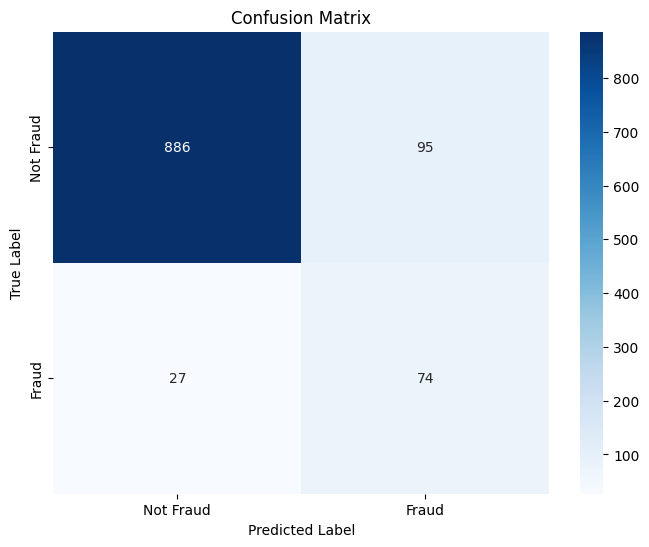

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       981
           1       0.44      0.73      0.55       101

    accuracy                           0.89      1082
   macro avg       0.70      0.82      0.74      1082
weighted avg       0.92      0.89      0.90      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model5.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Reduced learning rate (model 6)
f1 0.44

In [ ]:
# Define the model
model6 = Sequential()

# Input layer
model6.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model6.add(Dense(128, activation='relu'))

# Output layer
model6.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.00001
optim = Adam(learning_rate=lr)

# Compile the model
model6.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 236)               55932     
                                                                 
 dense_10 (Dense)            (None, 128)               30336     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


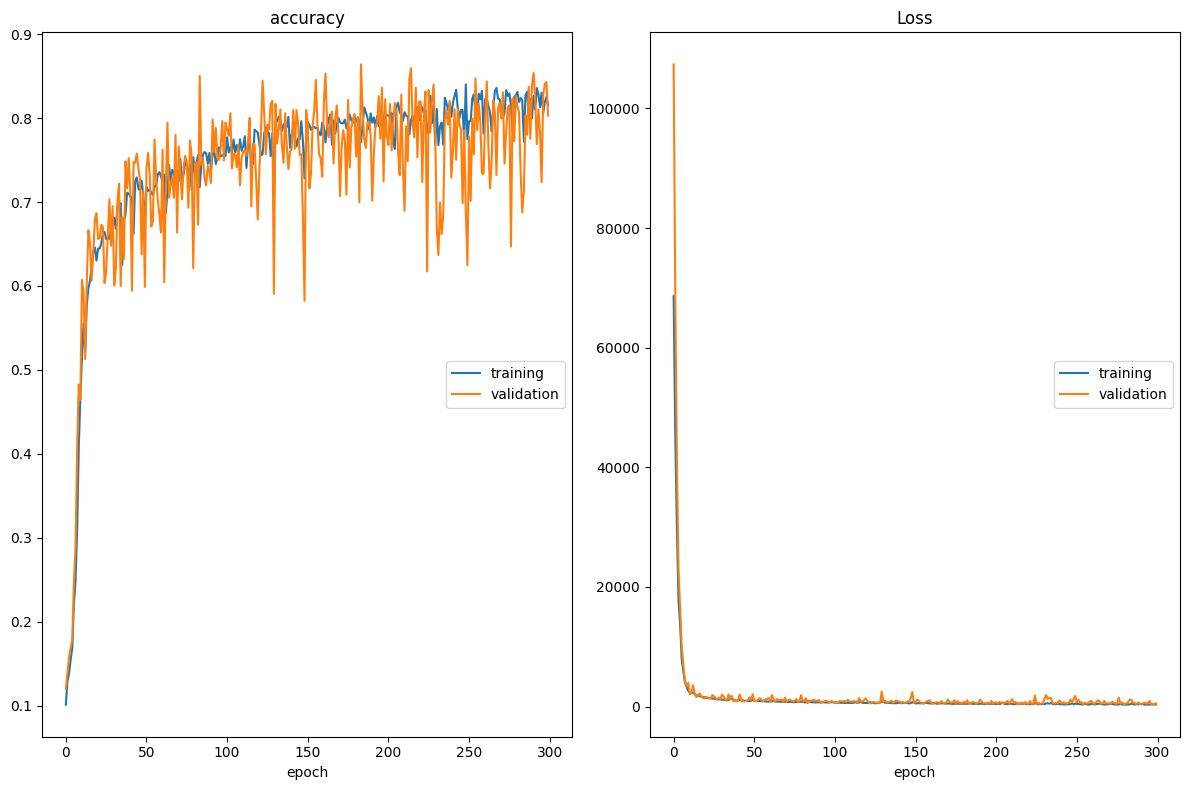

accuracy
	training         	 (min:    0.101, max:    0.840, cur:    0.816)
	validation       	 (min:    0.120, max:    0.864, cur:    0.803)
Loss
	training         	 (min:  318.435, max: 68619.547, cur:  364.658)
	validation       	 (min:  376.146, max: 107375.516, cur:  561.656)
34/34 [==============================] - 1s 35ms/step - loss: 364.6583 - accuracy: 0.8156 - val_loss: 561.6558 - val_accuracy: 0.8031


In [ ]:
checkpoint_path = "d6_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=300,
                           restore_best_weights=True)

plot_loss_6 = PlotLossesCallback()

history_6 = model6.fit(x_train,y_train,validation_data=(x_val,y_val),
                       batch_size=128,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_6],
                       class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


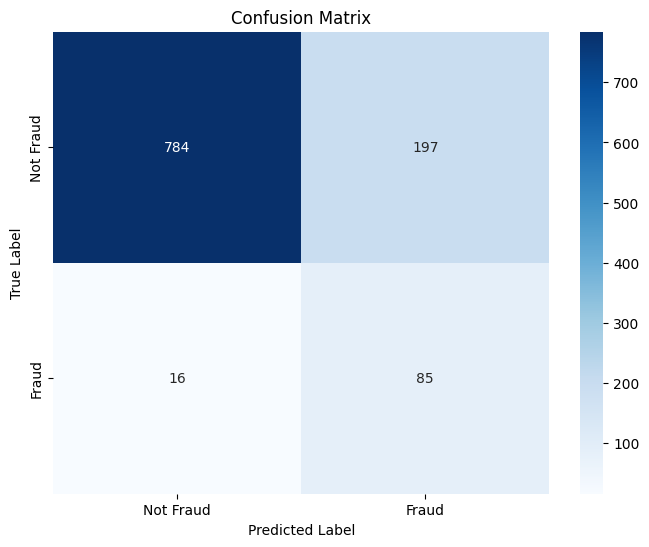

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       981
           1       0.30      0.84      0.44       101

    accuracy                           0.80      1082
   macro avg       0.64      0.82      0.66      1082
weighted avg       0.92      0.80      0.84      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model6.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Scaling data (model 7)
f1 0.64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_tr = standard_scaler.transform(x_train)
x_val_std = standard_scaler.transform(x_val)

# convert pandas.core.series.Series to numpy.ndarray
y_tr = y_train.to_numpy()
y_val_std = y_val.to_numpy()

In [ ]:
# Define the model
model7 = Sequential()

# Input layer
model7.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model7.add(Dense(128, activation='relu'))

# Output layer
model7.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model7.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 236)               55932     
                                                                 
 dense_13 (Dense)            (None, 128)               30336     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


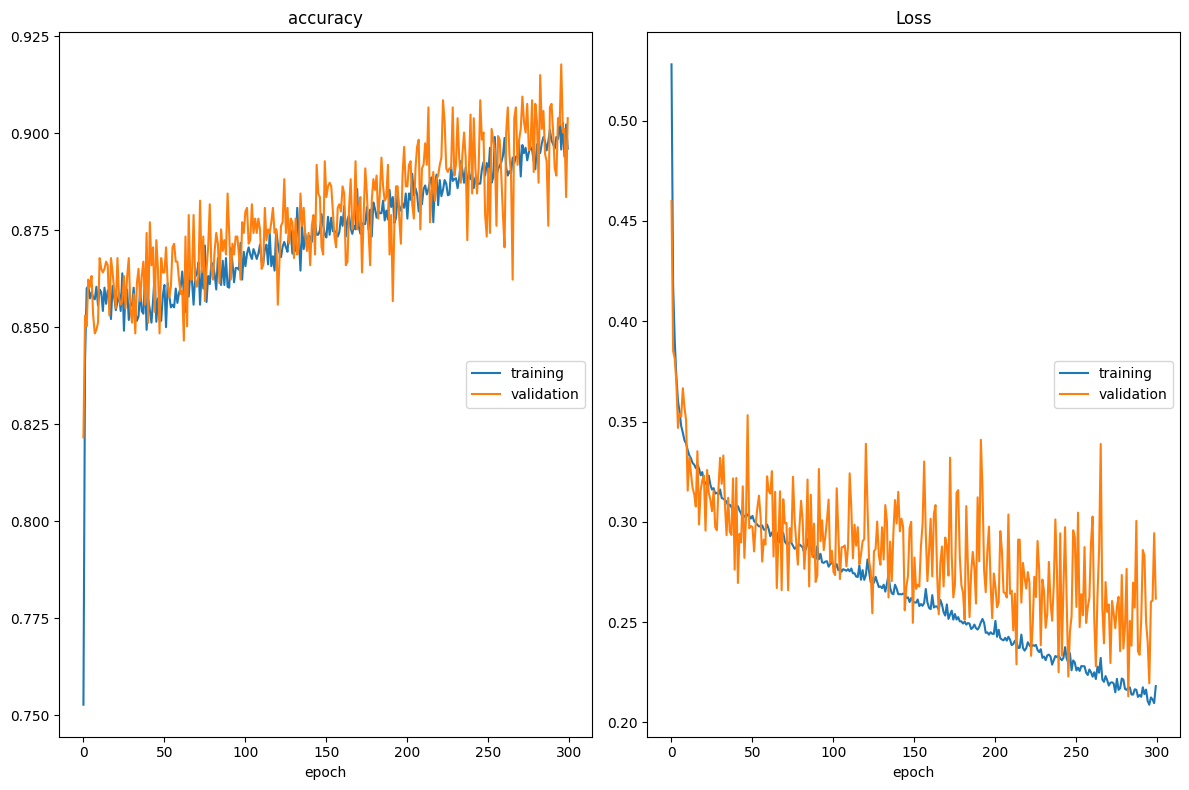

accuracy
	training         	 (min:    0.753, max:    0.904, cur:    0.896)
	validation       	 (min:    0.822, max:    0.918, cur:    0.904)
Loss
	training         	 (min:    0.209, max:    0.528, cur:    0.218)
	validation       	 (min:    0.213, max:    0.460, cur:    0.262)
34/34 [==============================] - 1s 21ms/step - loss: 0.2181 - accuracy: 0.8960 - val_loss: 0.2617 - val_accuracy: 0.9039


In [ ]:
checkpoint_path = "e7_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_7 = PlotLossesCallback()

history_7 = model7.fit(x_tr,y_tr,validation_data=(x_val_std,y_val_std),
                       batch_size=128,
                       epochs=300,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_7],
                       class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


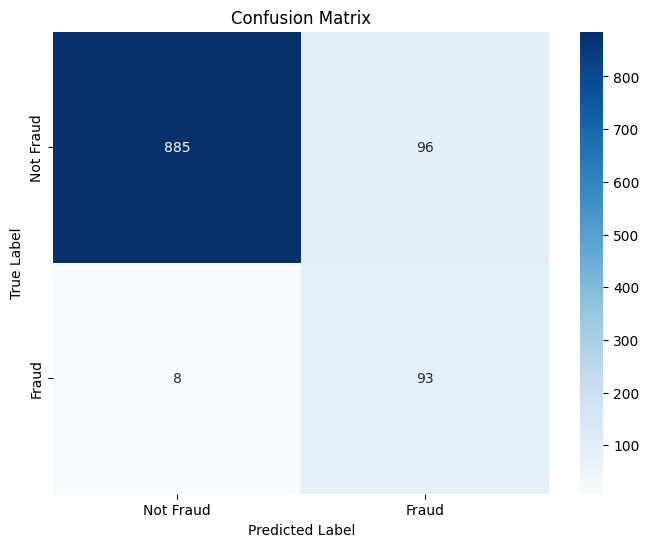

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       981
           1       0.49      0.92      0.64       101

    accuracy                           0.90      1082
   macro avg       0.74      0.91      0.79      1082
weighted avg       0.94      0.90      0.92      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model7.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Increase epochs for scaled data (model 8)
f1  0.63

In [ ]:
# Define the model
model8 = Sequential()

# Input layer
model8.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model8.add(Dense(128, activation='relu'))

# Output layer
model8.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model8.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 236)               55932     
                                                                 
 dense_16 (Dense)            (None, 128)               30336     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 86397 (337.49 KB)
Trainable params: 86397 (337.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


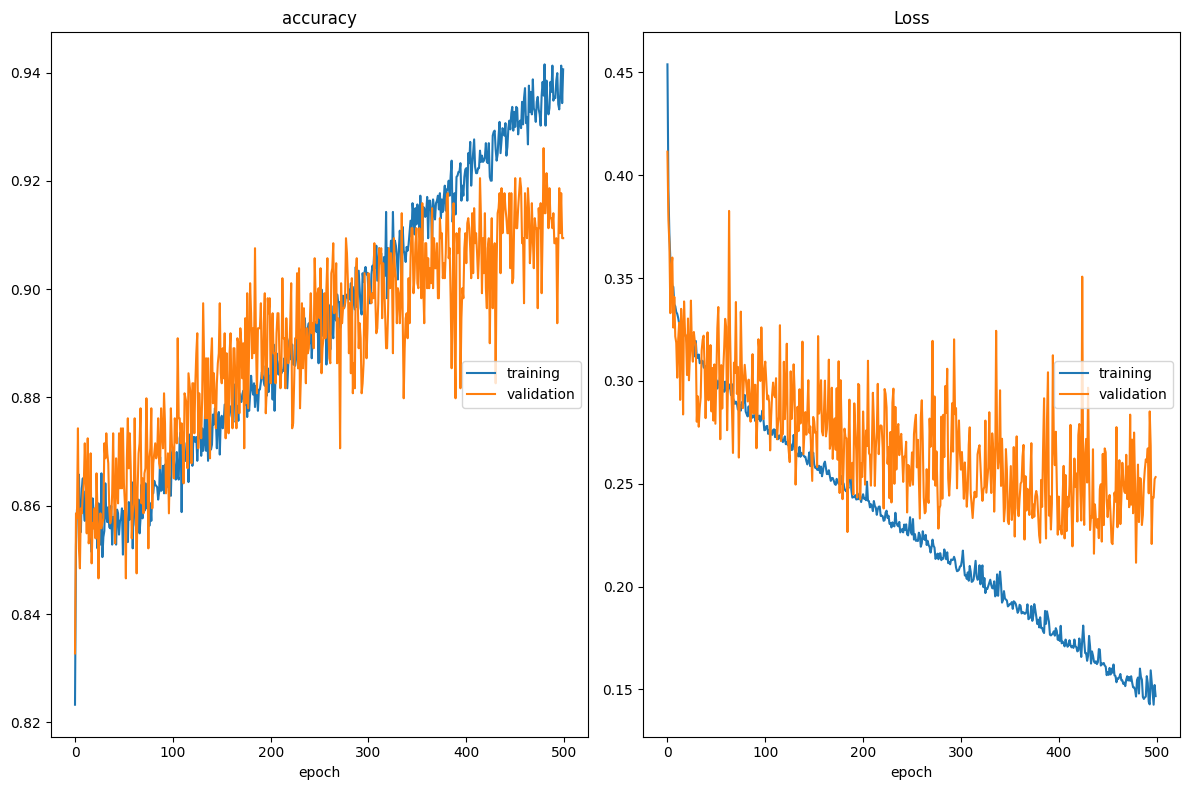

accuracy
	training         	 (min:    0.823, max:    0.942, cur:    0.941)
	validation       	 (min:    0.833, max:    0.926, cur:    0.909)
Loss
	training         	 (min:    0.143, max:    0.454, cur:    0.147)
	validation       	 (min:    0.212, max:    0.411, cur:    0.253)
34/34 [==============================] - 1s 30ms/step - loss: 0.1467 - accuracy: 0.9406 - val_loss: 0.2532 - val_accuracy: 0.9094


In [ ]:
checkpoint_path = "f8_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_8 = PlotLossesCallback()

history_8 = model8.fit(x_tr,y_tr,validation_data=(x_val,y_val),
                       batch_size=128,
                       epochs=500,
                       callbacks=[checkpoint_callback, early_stop, plot_loss_8],
                       class_weight=class_weight_dict)

34/34 [==============================] - 0s 2ms/step


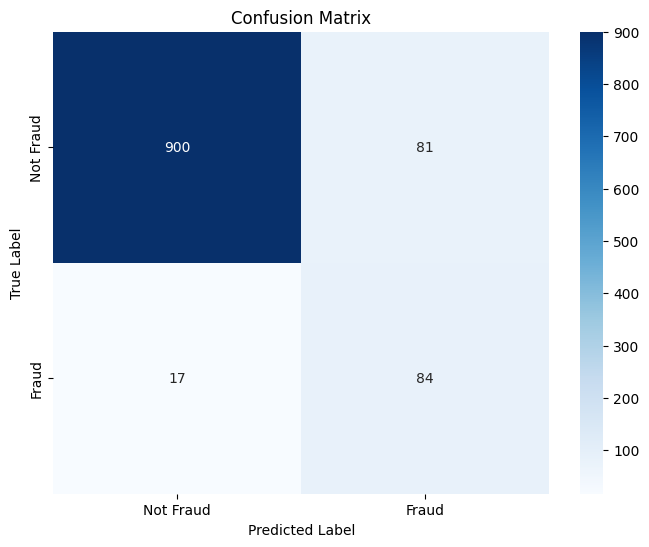

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       981
           1       0.51      0.83      0.63       101

    accuracy                           0.91      1082
   macro avg       0.75      0.87      0.79      1082
weighted avg       0.94      0.91      0.92      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model8.predict(x_val)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Last Model (Deep architecture w no dropout, class weights, standardized data) (model 9 )
F1 0.62

In [ ]:
# Define the model
model9 = Sequential()

# Input layer
model9.add(Dense(236, input_shape=(236,), activation='relu'))

#Hidden layers
model9.add(Dense(128, activation='relu'))

model9.add(Dense(64, activation='relu'))

model9.add(Dense(32, activation='relu'))

# Output layer
model9.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a custom learning rate
lr = 0.0001
optim = Adam(learning_rate=lr)

# Compile the model
model9.compile(optimizer = optim, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 236)               55932     
                                                                 
 dense_32 (Dense)            (None, 128)               30336     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 96637 (377.49 KB)
Trainable params: 96637 (377.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_tr = standard_scaler.transform(x_train)
x_val_std = standard_scaler.transform(x_val)

# convert pandas.core.series.Series to numpy.ndarray
y_tr = y_train.to_numpy()
y_val_std = y_val.to_numpy()

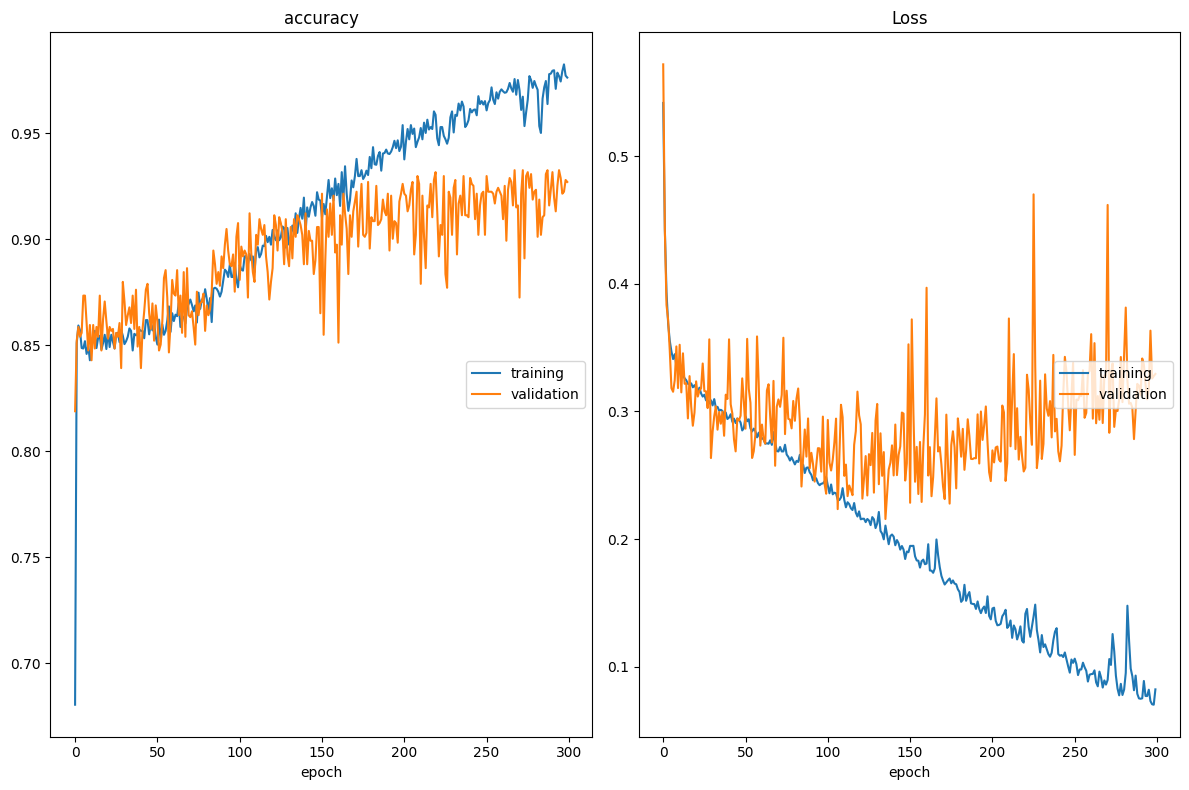

accuracy
	training         	 (min:    0.680, max:    0.982, cur:    0.976)
	validation       	 (min:    0.819, max:    0.933, cur:    0.927)
Loss
	training         	 (min:    0.070, max:    0.542, cur:    0.082)
	validation       	 (min:    0.216, max:    0.572, cur:    0.329)
34/34 [==============================] - 1s 32ms/step - loss: 0.0823 - accuracy: 0.9762 - val_loss: 0.3294 - val_accuracy: 0.9270


In [ ]:
# Define the checkpoint callback to save the best model
checkpoint_path = "9_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=100,
                           restore_best_weights=True)

plot_loss_9 = PlotLossesCallback()

# Train the model
history_9 = model9.fit(x_tr, y_tr,
                    epochs=300,  # You can adjust the number of epochs
                    batch_size=128,
                    validation_data=(x_val_std, y_val_std),
                    callbacks=[checkpoint_callback, early_stop, plot_loss_9],
                    class_weight = class_weight_dict)

34/34 [==============================] - 0s 2ms/step


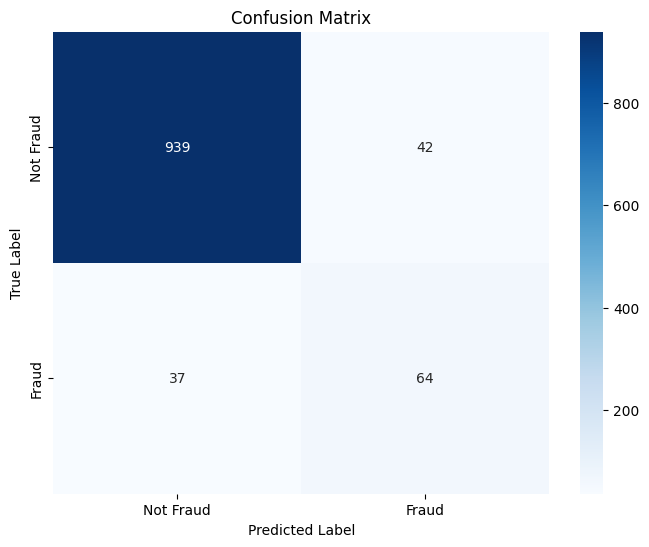

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       981
           1       0.60      0.63      0.62       101

    accuracy                           0.93      1082
   macro avg       0.78      0.80      0.79      1082
weighted avg       0.93      0.93      0.93      1082



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = model9.predict(x_val_std)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

### Model selection

In conclusion, Model 1 , a neural network with 4 layers (236, 128, 64, and 32 neurons respectively), no dropout, batch size of 128,  300 epochs and consideration for class weights, stands out with a high F1 score. Its selection is motivated by both superior performance and the advantage of requiring minimal preprocessing. (Standardization). This streamlined approach aligns with our goal of achieving optimal results with efficiency.


## 5. Outline data / model assumptions & limitations / hypotheses – can this model be used out-of-the-box for a new population cohort and why?  
  *   **Assumptions**: Claims data reflects accurate information, and patterns generalize to fraud detection.
  *   **Limitations**: Model performance may vary with changing healthcare landscapes; it may not capture evolving fraud tactics.
  *   **Hypotheses**: The model can provide valuable insights for fraud detection but may require constant adaptation for new population cohorts due to healthcare system variations, price inflation and improved fraud techniques.
  

## 6. Outline briefly what other models/factors you considered before finalizing your model


Before finalizing our state-of-the-art neural network model, several models and factors were considered in our comprehensive exploration. The initial realization that out-of-the-box methods like tree-based forests might not meet the desired level of sophistication prompted our shift towards deep learning.

Within the realm of deep learning, we conducted an exhaustive search across various network architectures, experimenting with different dropout ratios, batch sizes, learning rates, and epochs during training. This iterative process allowed us to fine-tune our model for optimal performance, ensuring that it could effectively capture the intricate patterns inherent in healthcare fraud data.

Additionally, we delved into data preprocessing techniques, exploring the application of class weights to address class imbalances and normalizing the data to enhance model generalization. These considerations were crucial in achieving a balanced and high-performing neural network tailored specifically for our application.

In summary, our journey involved a strategic departure from conventional methods, an exploration of diverse deep learning architectures, and meticulous adjustments to data preprocessing techniques. The culmination of these efforts led us to the development of a state-of-the-art neural network model that stands at the forefront of healthcare fraud detection.

## 7.- Evaluate model metrics and interpret the results in practical health care setting.

In the evaluation of the fraud detection neural network model, the classification report reveals insightful metrics for practical interpretation within a healthcare setting.

The precision of 96% for class 0 indicates that when the model predicts a transaction as non-fraudulent, it is correct 96% of the time. This is crucial in healthcare finance, ensuring that legitimate transactions are accurately identified.

On the other hand, for class 1 (fraudulent transactions), the model demonstrates a precision of 64%. This implies that when the model predicts a transaction as fraudulent, it is accurate 64% of the time. In healthcare, where fraudulent activities can have severe consequences, this metric is a key factor in determining the reliability of the model.

The recall metric is equally significant. A recall of 96% for class 0 suggests that the model effectively captures 96% of all actual non-fraudulent transactions. In healthcare finance, this ensures a robust identification of legitimate transactions, preventing unnecessary concerns or disruptions.

However, for class 1, the recall is 63%, indicating that the model captures only 63% of actual fraudulent transactions. In a healthcare fraud detection scenario, this might imply that some fraudulent activities could go undetected, highlighting a potential area for improvement.


In summary, the model demonstrates strong performance in identifying non-fraudulent transactions, while there is room for improvement in detecting fraudulent transactions. These insights are crucial for refining the model, ensuring its robustness in a healthcare fraud detection setting where accuracy is paramount.

## 8.- Discuss how your model is different than the base model and how the model can be further improved

The selected neural network (NN) model exhibits notable differences from the baseline model, as evidenced by the classification report and the confusion matrix. In comparison to the baseline, the chosen NN model has demonstrated improved overall performance with 945 true negatives vs 802 from the baseline model, 64 true positives vs 92, 36 false positives vs 179, and 37 false negatives vs 9. This indicates a small tradeoff in the ability to correctly identify non-fraudulent transactions (true negatives) with an enhanced capability to detect fraudulent transactions with a greater positive predictive value PPV =  TP/(TP + FP).  

In terms of detecting non-fraudulent transactions the Negative Predictive Value (NPV) went from 0.98 to 0.96. In other words, whenever we predict a non-fraudulent provider, our confidence of it actually being non-frauduent went down 2% from 98% to 96.

But, the tradeoff is in the fraudulent detections. Positive predictive value (PPV) improved from 0.33 on baseline model to 0.64 in the custom model.Another way to looks at this is that whenever the model predicts a fraudulent provider, our model doubles the certainty of it actually being fraudulent. This is a big step forward.

## 9.- Effectively communicate and pitch for why your model is state-of-the-art for the health care problem.

Our state-of-the-art neural network model for healthcare fraud detection represents a groundbreaking departure from conventional industry practices. While the industry often relies on Random Forests or tree-based approaches, our deep neural network classification introduces a new era of sophistication. Unlike traditional methods, our model excels in deciphering intricate and complex interactions within the data, providing a level of granularity and accuracy unmatched by its counterparts.

By leveraging a four-layer architecture with 236, 128, 64, and 32 neurons, our model transcends the limitations of tree-based approaches. The absence of dropout, coupled with class weights, ensures a more nuanced and informed learning process. This capability allows our model to navigate through intricate patterns, adapting to the evolving landscape of healthcare fraud, where subtle and complex interactions are often at play.

In essence, our state-of-the-art model is not only a technological advancement but a strategic shift away from industry norms. Its ability to understand and interpret intricate data interactions positions it as the forefront solution in healthcare fraud detection, offering unparalleled accuracy and efficacy compared to traditional Random Forest or tree-based methodologies.